IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      61.0 -0.125117   0.032332   -0.685533   0.218879          0.0   
1      54.0 -0.049643   0.006284   -0.095890   0.093448          0.0   
2      58.0 -0.046358   0.016269   -0.490543   0.135566         96.0   
3      34.0 -0.022876   0.006930   -0.505271   0.086229        103.0   
4      29.0 -0.063200   0.012123    0.337009   0.126828          0.0   
...     ...       ...        ...         ...        ...          ...   
1344   66.0 -0.034869   0.010077    1.913965   0.106152         70.0   
1345   20.0 -0.044356   0.018897   -0.849644   0.144269         79.0   
1346    1.0 -0.141375   0.034725   -0.867272   0.233694         99.0   
1347   46.0 -0.032960   0.020132   -0.161222   0.145491        108.0   
1348   46.0  0.011258   0.049799    2.666583   0.223160         81.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0           124.0   27.516759    5.998920 -0.003860  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.125117   0.032332   -0.685533   0.218879          0.0        124.0   
1    -0.049643   0.006284   -0.095890   0.093448          0.0        109.0   
2    -0.046358   0.016269   -0.490543   0.135566         96.0         93.0   
3    -0.022876   0.006930   -0.505271   0.086229        103.0         77.0   
4    -0.063200   0.012123    0.337009   0.126828          0.0         72.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.034869   0.010077    1.913965   0.106152         70.0         95.0   
1345 -0.044356   0.018897   -0.849644   0.144269         79.0         60.0   
1346 -0.141375   0.034725   -0.867272   0.233694         99.0         93.0   
1347 -0.032960   0.020132   -0.161222   0.145491        108.0         81.0   
1348  0.011258   0.049799    2.666583   0.223160         81.0         78.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.039074    0.01015    1.767735   0.107952         96.0         73.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340    5.473812    5.118031 -0.010631   0.005796  ...        5523.91455   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340         3.406959          0.433138           0.109951          3.469799   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               146.0               144.0          15.946724   

     amp2(Curr(ESC_5))  Guasto  
340          15.482712       1  

[1 rows x 167 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.125117   0.032332   -0.685533   0.218879          0.0        124.0   
1    -0.049643   0.006284   -0.095890   0.093448          0.0        109.0   
2    -0.046358   0.016269   -0.490543   0.135566         96.0         93.0   
3    -0.022876   0.006930   -0.505271   0.086229        103.0         77.0   
4    -0.063200   0.012123    0.337009   0.126828          0.0         72.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.034869   0.010077    1.913965   0.106152         70.0         95.0   
1345 -0.044356   0.018897   -0.849644   0.144269         79.0         60.0   
1346 -0.141375   0.034725   -0.867272   0.233694         99.0         93.0   
1347 -0.032960   0.020132   -0.161222   0.145491        108.0         81.0   
1348  0.011258   0.049799    2.666583   0.223160         81.0         78.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.125117   0.032332   -0.685533   0.218879     0.000000   124.000000   
1    -0.049643   0.006284   -0.095890   0.093448     0.000000   109.000000   
2    -0.046358   0.016269   -0.490543   0.135566    96.000000    93.000000   
3    -0.022876   0.006930   -0.505271   0.086229   103.000000    77.000000   
4    -0.063200   0.012123    0.337009   0.126828     0.000000    72.000000   
...        ...        ...         ...        ...          ...          ...   
1618  0.007396   0.007600   -0.468887   0.087372     0.000000    88.368180   
1619 -0.000517   0.007030   -0.252770   0.083749     0.000000   115.107808   
1620 -0.030190   0.009997    2.078902   0.104325    63.530773    82.707697   
1621 -0.021245   0.006741   -0.473103   0.084705    70.078091    94.957405   
1622 -0.140577   0.040834   -1.516407   0.245952    65.544942    81.433882   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=25)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=25, score_func=<function f_regression at 0x000001FC3ACBD120>)
[False False False False  True False False False  True  True False  True
  True False  True False False  True False  True False False  True False
 False False False False  True False  True False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False  True  True  True False  True False False False
 False False False False False False False False  True  True False False
 False False False False False False False False  True False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False

In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

        Input_Features   F_Score
34          kurt(AccY)  5.328678
28         freq1(AccX)  3.493867
12         freq1(GyrY)  3.103871
11           RMS(GyrY)  2.784047
9            var(GyrY)  2.654796
153   kurt(RPM(ESC_5))  2.611513
93   freq2(RPM(ESC_1))  2.610511
92   freq1(RPM(ESC_1))  2.603588
14          amp1(GyrY)  2.389052
159   var(Curr(ESC_5))  2.369993
8             <>(GyrY)  1.859372
104     <>(RPM(ESC_2))  1.835967
78    amp1(RPM(ESC_0))  1.802775
152    var(RPM(ESC_5))  1.784613
107    RMS(RPM(ESC_2))  1.533233
32            <>(AccY)  1.492339
22          amp1(GyrZ)  1.482284
76   freq1(RPM(ESC_0))  1.261284
62         amp1(Pitch)  1.232796
30          amp1(AccX)  1.138972
77   freq2(RPM(ESC_0))  1.127634
4          freq1(GyrX)  1.021784
17           var(GyrZ)  1.017933
80     <>(Curr(ESC_0))  0.942791
19           RMS(GyrZ)  0.909547
57          var(Pitch)  0.874456
81    var(Curr(ESC_0))  0.817087
156   amp1(RPM(ESC_5))  0.788926
15          amp2(GyrY)  0.615679
97    var(

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[0, 1, 2, 3, 5, 6, 7, 10, 13, 15, 16, 18, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  \
0        0.000000 -0.003860   0.006072   0.077923    92.000000    3.077894   
1        0.000000  0.033530   0.003763   0.069843   111.000000    5.209037   
2       96.000000  0.003136   0.026381   0.162254     0.000000   20.460438   
3      103.000000  0.044851   0.012513   0.120381   105.000000   17.851685   
4        0.000000  0.016579   0.006600   0.082809   103.000000    2.847427   
...           ...       ...        ...        ...          ...         ...   
1618     0.000000  0.018939   0.005725   0.077895    70.211371    1.603925   
1619     0.000000  0.013194   0.005283   0.073788   124.269521    3.366790   
1620    63.530773 -0.008905   0.006045   0.078159   107.607692    7.635796   
1621    70.078091  0.044255   0.012596   0.120507   107.011832   17.147145   
1622    65.544942  0.027848   0.008910   0.098299    88.412706    2.335629   

      var(GyrZ)  RMS(GyrZ)  amp1(GyrZ)  freq1(AccX)  ...  freq2

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  \
340         96.0 -0.010631   0.005796   0.076784        116.0    8.116157   

     var(GyrZ)  RMS(GyrZ)  amp1(GyrZ)  freq1(AccX)  ...  freq2(RPM(ESC_0))  \
340   0.004152   0.107883    5.071074        139.0  ...               53.0   

     amp1(RPM(ESC_0))  <>(Curr(ESC_0))  freq1(RPM(ESC_1))  freq2(RPM(ESC_1))  \
340      25760.665449         3.527304              145.0              143.0   

     <>(RPM(ESC_2))  RMS(RPM(ESC_2))  var(RPM(ESC_5))  kurt(RPM(ESC_5))  \
340     5220.108295      5292.933556     892613.08677          -0.47191   

     var(Curr(ESC_5))  
340          0.433138  

[1 rows x 25 columns]


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.6): # qui invece che 0.5 uso 0.6
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      freq1(GyrX)  <>(GyrY)  var(GyrY)  var(GyrZ)  RMS(GyrZ)  amp1(GyrZ)  \
0        0.000000 -0.003860   0.006072   0.007965   0.160713    2.018486   
1        0.000000  0.033530   0.003763   0.012799   0.222261    3.607372   
2       96.000000  0.003136   0.026381   0.018035   0.186310    1.580724   
3      103.000000  0.044851   0.012513   0.008248   0.150463    3.201890   
4        0.000000  0.016579   0.006600   0.004707   0.123980    3.642940   
...           ...       ...        ...        ...        ...         ...   
1618     0.000000  0.018939   0.005725   0.005922   0.162856    0.919873   
1619     0.000000  0.013194   0.005283   0.005452   0.154165    1.232332   
1620    63.530773 -0.008905   0.006045   0.004479   0.110595    3.768024   
1621    70.078091  0.044255   0.012596   0.008315   0.151035    2.941003   
1622    65.544942  0.027848   0.008910   0.005506   0.152006    1.342840   

      <>(AccY)  kurt(AccY)  amp1(Pitch)  <>(Curr(ESC_0))  freq1(RPM(ESC_1))  \
0     0.

In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     freq1(GyrX)  <>(GyrY)  var(GyrY)  var(GyrZ)  RMS(GyrZ)  amp1(GyrZ)  \
340         96.0 -0.010631   0.005796   0.004152   0.107883    5.071074   

     <>(AccY)  kurt(AccY)  amp1(Pitch)  <>(Curr(ESC_0))  freq1(RPM(ESC_1))  \
340  0.172109     0.34298    19.517476         3.527304              145.0   

     <>(RPM(ESC_2))  var(RPM(ESC_5))  kurt(RPM(ESC_5))  var(Curr(ESC_5))  
340     5220.108295     892613.08677          -0.47191          0.433138  


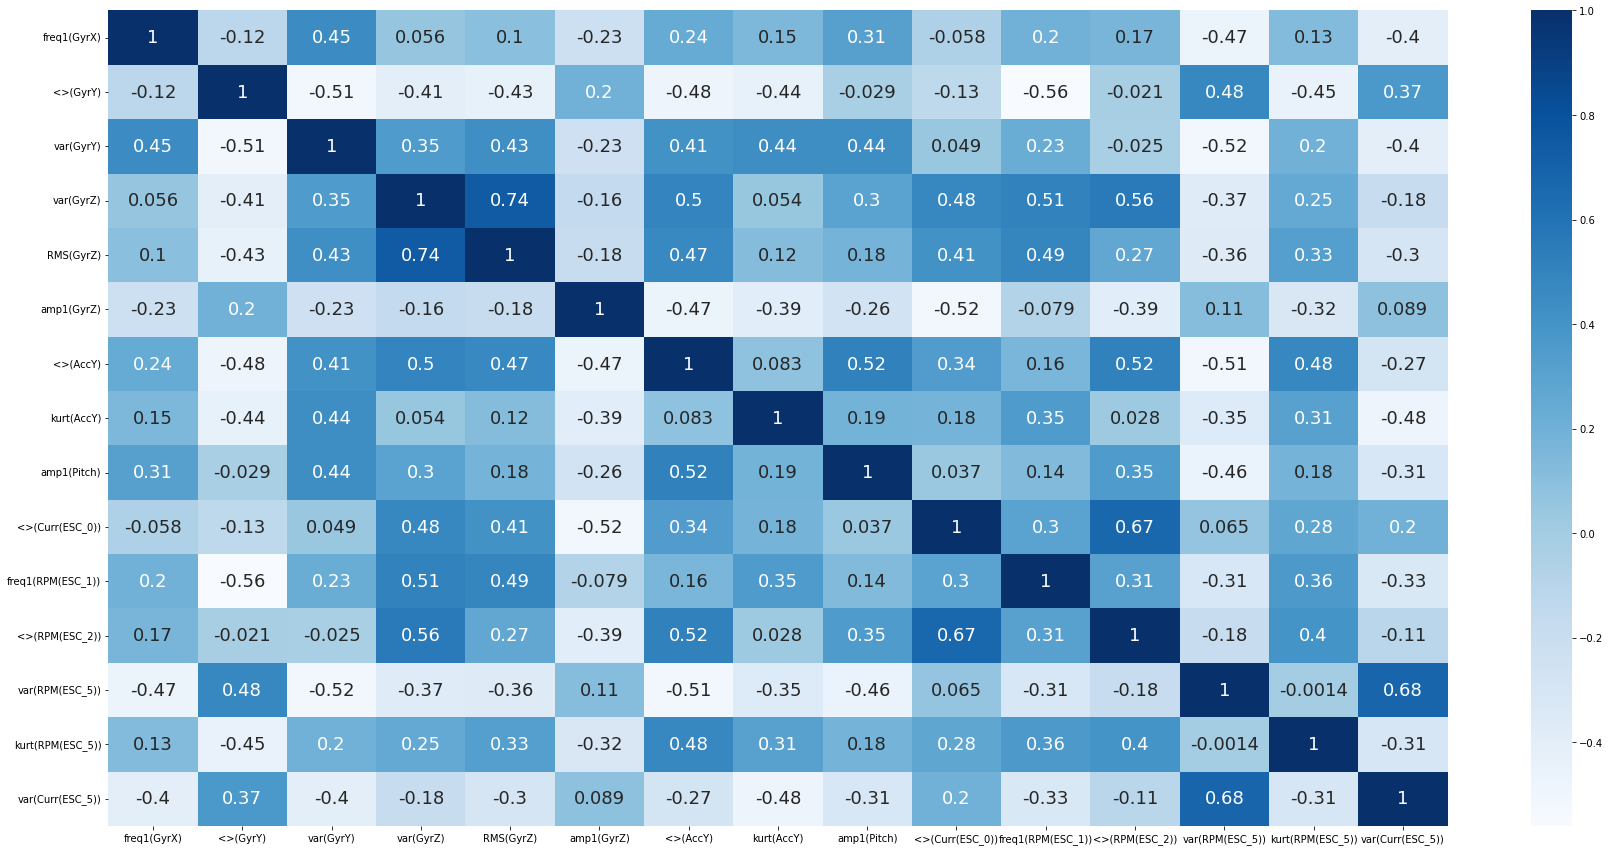

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 15)
(325, 15)
(1298, 1)
(325, 1)


In [22]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

In [23]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')

    print("----------------------------------------------------")
    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    
    i += 1

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


Cross-Validation: [0.91538462 0.90769231 0.93461538 0.91505792 0.92277992]
Accuracy: 0.87 	 ---> LogisticRegression 
Test: 1    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.76923077 0.79230769 0.74230769 0.76447876 0.78378378]
Accuracy: 0.77 	 ---> SVC 
Test: 1    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.33461538 0.58846154 0.5        0.66795367 0.58687259]
Accuracy: 0.37 	 ---> MLPClassifier 
Test: 2    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.32307692 0.32307692 0.33461538 0.32432432 0.34362934]
Accuracy: 0.67 	 ---> SGDClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64
----------------------------------------------------


### Matrici di confusione

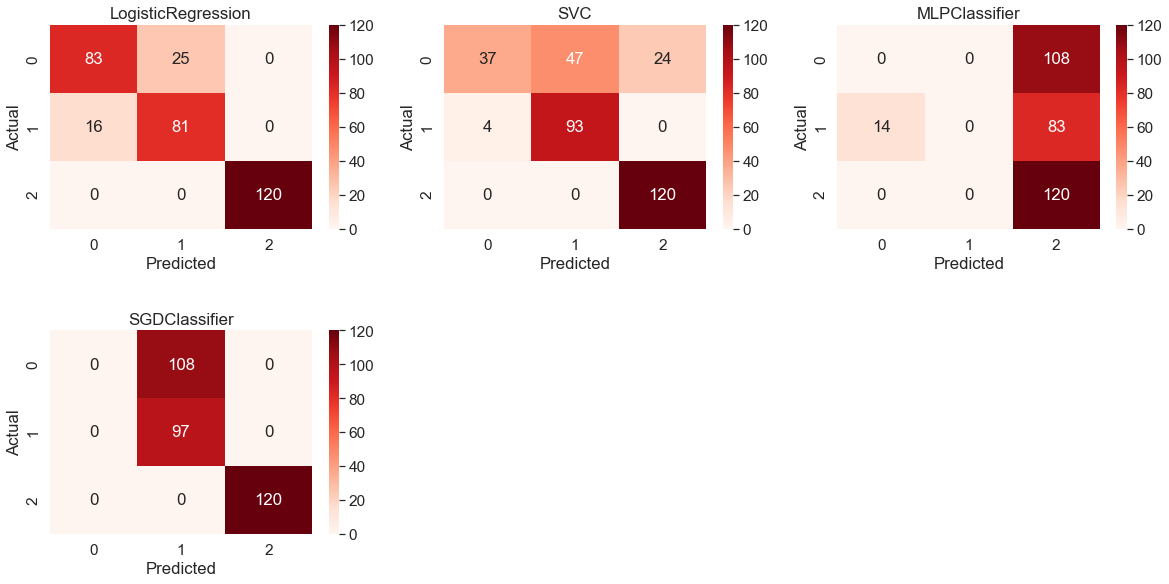

In [24]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Scores

Text(0.5, 1.0, 'Cross validation scores')

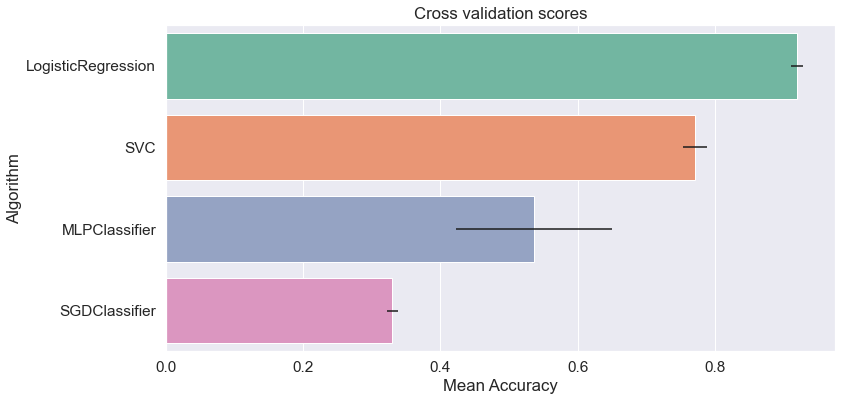

In [25]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [26]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       108
           1       0.76      0.84      0.80        97
           2       1.00      1.00      1.00       120

    accuracy                           0.87       325
   macro avg       0.87      0.87      0.87       325
weighted avg       0.88      0.87      0.87       325

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.34      0.50       108
           1       0.66      0.96      0.78        97
           2       0.83      1.00      0.91       120

    accuracy                           0.77       325
   macro avg       0.80      0.77      0.73       325
weighted avg       0.81      0.77      0.73       325

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.00